In [2]:
import pandas as pd

 # Load the CSV file
df = pd.read_csv("C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/LabProject(Titanic)/Titanic-Dataset.csv")

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get a summary of the dataset (data types, non-null counts)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Get basic statistical details (mean, std, min, max, etc.)
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Count missing values in each column
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns




In [13]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df['Survived']


In [18]:
df.fillna({'Age': df['Age'].median()}, inplace=True)
# Display first few rows to verify
print(df[['Age']].head(10))



    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
5  28.0
6  54.0
7   2.0
8  27.0
9  14.0


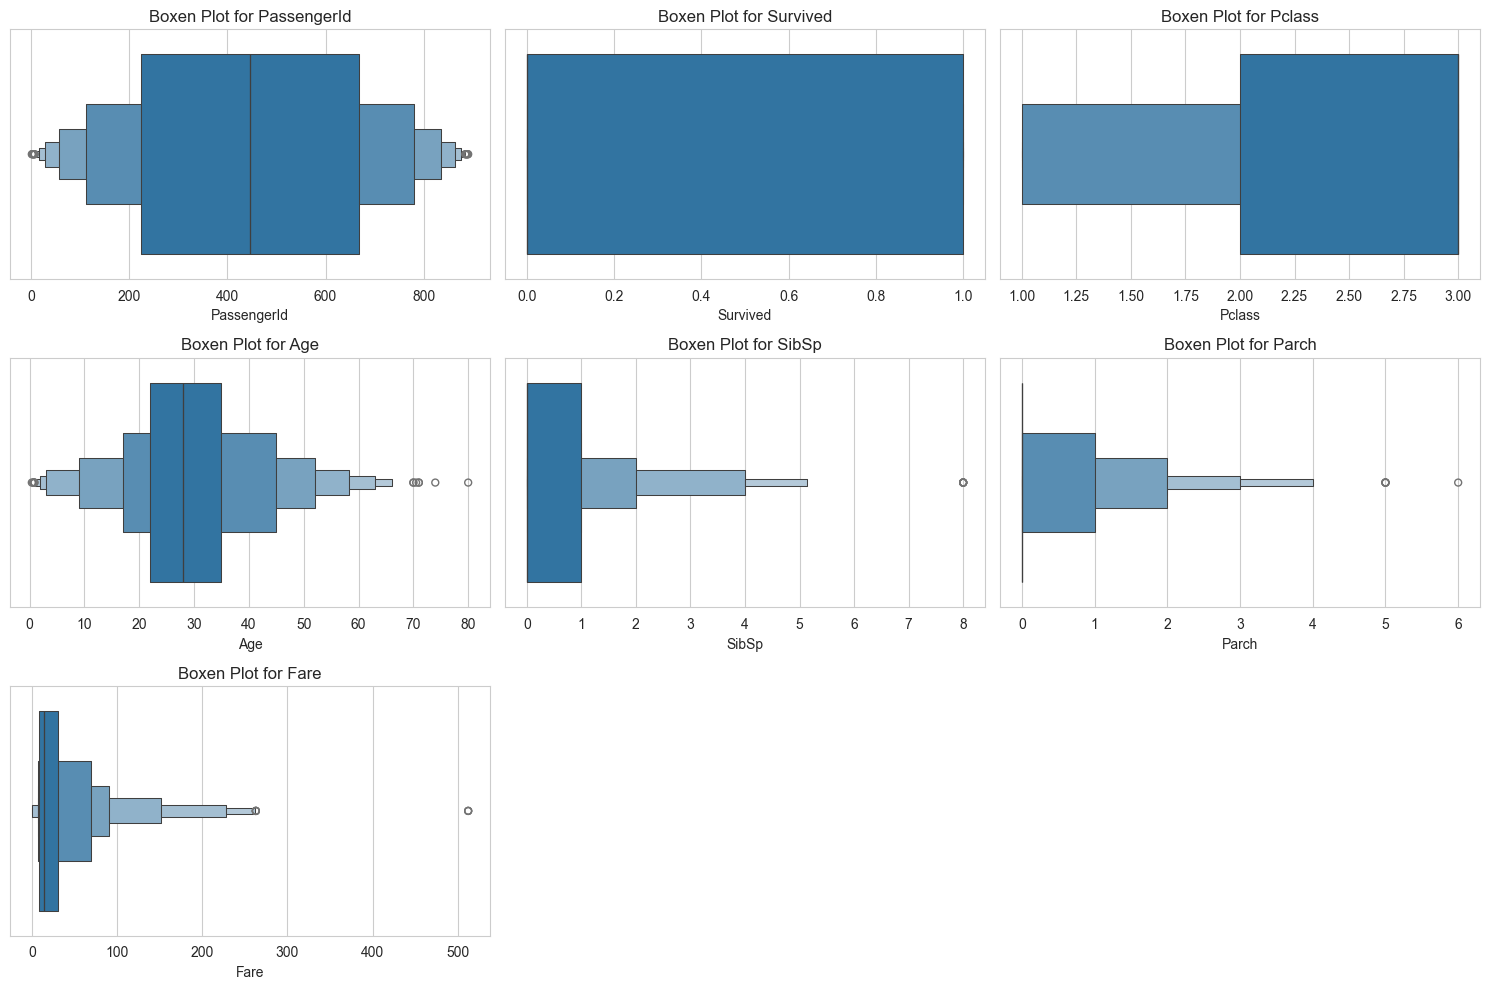

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create boxen plots for each numerical column
plt.figure(figsize=(15, 10))

# Calculate rows and columns dynamically based on the number of numerical columns
n_cols = 3
n_rows = (len(numerical_cols) // n_cols) + (1 if len(numerical_cols) % n_cols != 0 else 0)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust rows/columns based on the number of numerical features
    sns.boxenplot(x=df[col])  # Use 'x' for horizontal plots or 'y' for vertical plots
    plt.title(f'Boxen Plot for {col}')

plt.tight_layout()
plt.show()



ValueError: num must be an integer with 1 <= num <= 9, not 10

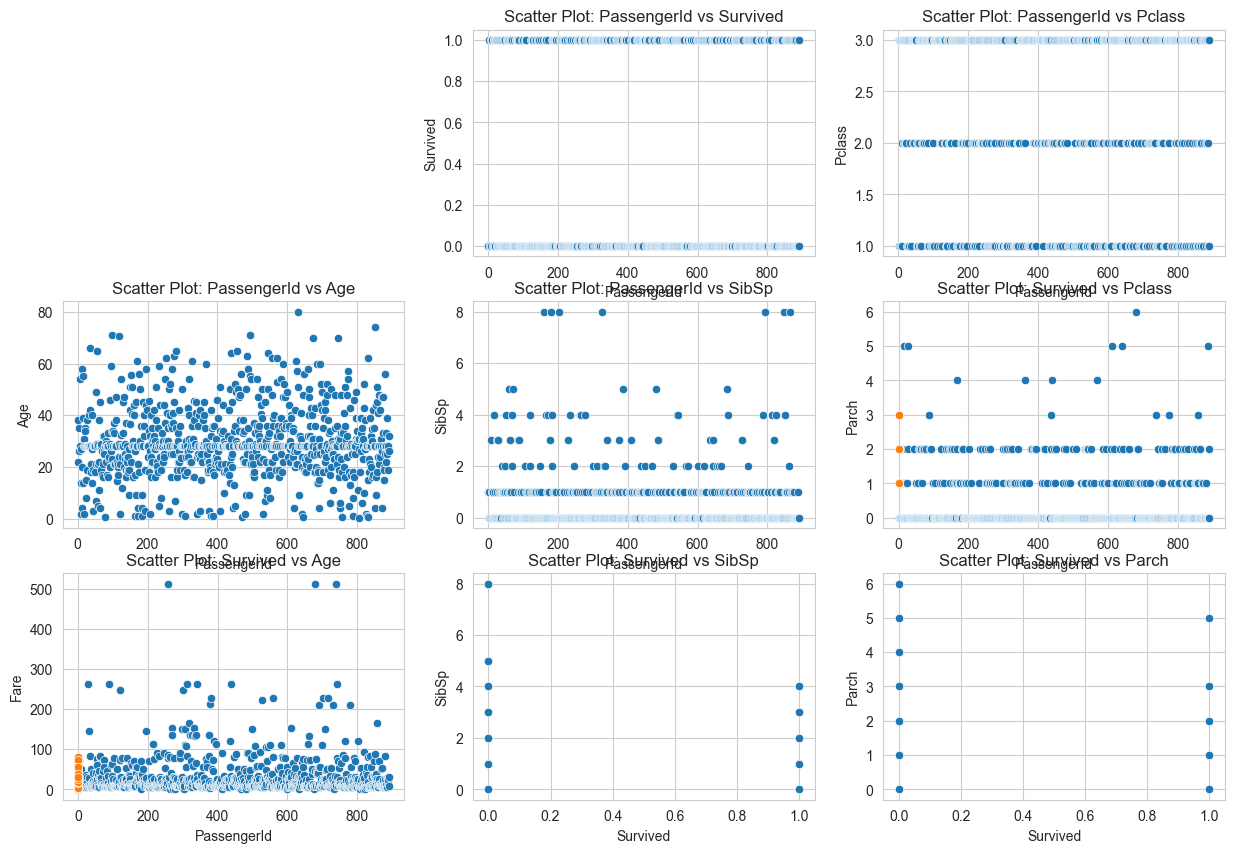

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create scatter plots for each pair of numerical columns
plt.figure(figsize=(15, 10))

# Calculate rows and columns dynamically based on the number of numerical columns
n_cols = 3
n_rows = (len(numerical_cols) // n_cols) + (1 if len(numerical_cols) % n_cols != 0 else 0)

for i, col1 in enumerate(numerical_cols, 1):
    for j, col2 in enumerate(numerical_cols[i:], i+1):  # Compare each pair of columns
        plt.subplot(n_rows, n_cols, (i-1)*n_cols + j)  # Adjust rows/columns based on the number of numerical features
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'Scatter Plot: {col1} vs {col2}')

plt.tight_layout()
plt.show()
